Cognos Analytics 

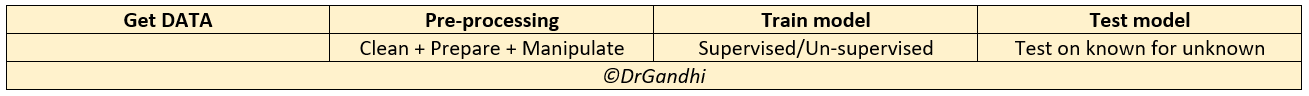

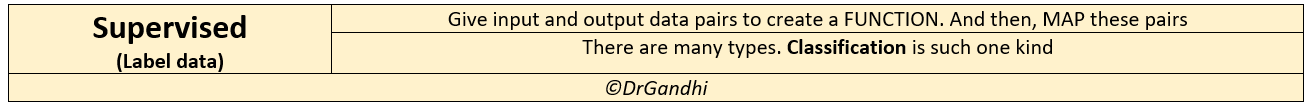

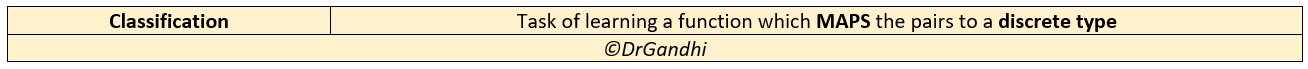

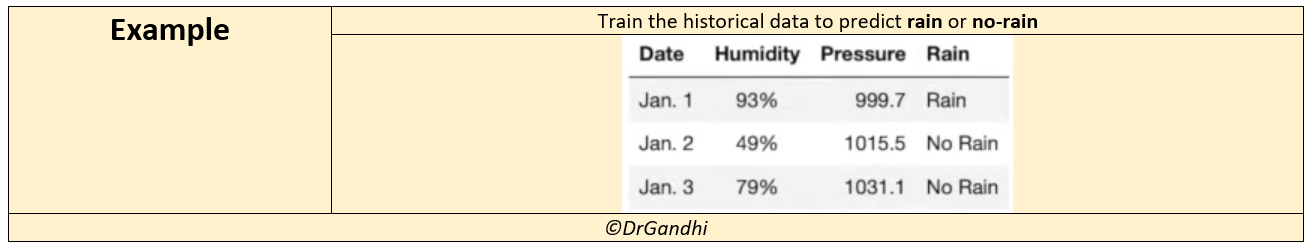

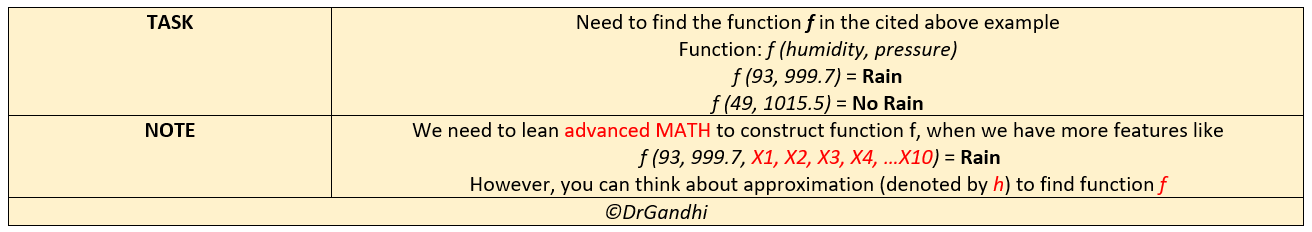

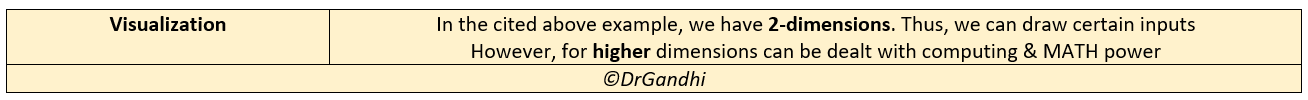

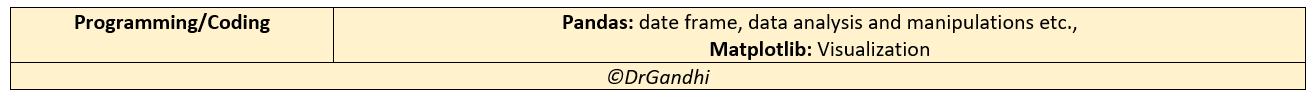

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('WEATHER.csv')

In [4]:
data.head(3)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes


In [5]:
# parse_dates == describing the dates in column 
data = pd.read_csv('WEATHER.csv', parse_dates=True, index_col=0)
data.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes


In [6]:
# Checking index (date time index there or NOT)
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

In [7]:
# Create new data set from data (as per YOUR requirement)
newdata = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']]
newdata.head(3)

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes
2008-02-03,86.0,1015.6,Yes


In [8]:
# for visulization 
import matplotlib.pyplot as plt 
%matplotlib inline

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

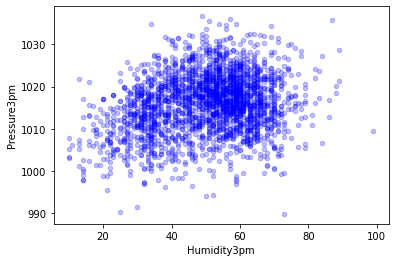

In [9]:
fig, ax = plt.subplots()
newdata[newdata['RainTomorrow'] == 'No'].plot.scatter(x = 'Humidity3pm', y = 'Pressure3pm', c='b', alpha = 0.25, ax=ax)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

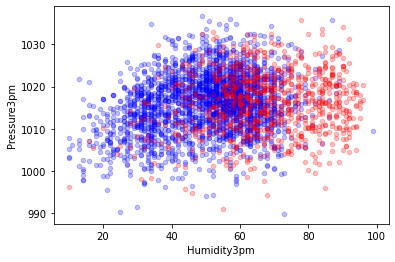

In [10]:
# Let us consider both Rain and No Rain (Yes and No respectively)
fig, ax = plt.subplots()
newdata[newdata['RainTomorrow'] == 'No'].plot.scatter(x = 'Humidity3pm', y = 'Pressure3pm', c='b', alpha = 0.25, ax=ax)
newdata[newdata['RainTomorrow'] == 'Yes'].plot.scatter(x = 'Humidity3pm', y = 'Pressure3pm', c='r', alpha = 0.25, ax=ax)

From the cited above picture, we can notice the follwoing

1) If both humidity & pressure increased... Then WHAT?

2) If decresed... Then WHAT?

Picture gives YOU some clarity

**KNN Classicication** = Nearest-Neighbors Classification

K = near neighbour, and it can take 1 or 2 or 3 etc., 

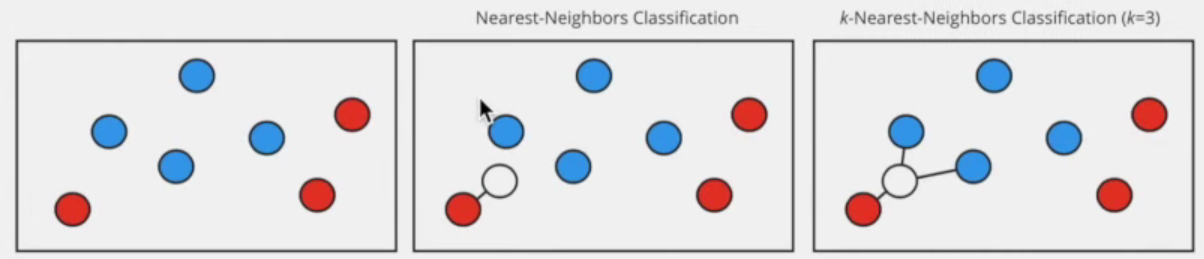

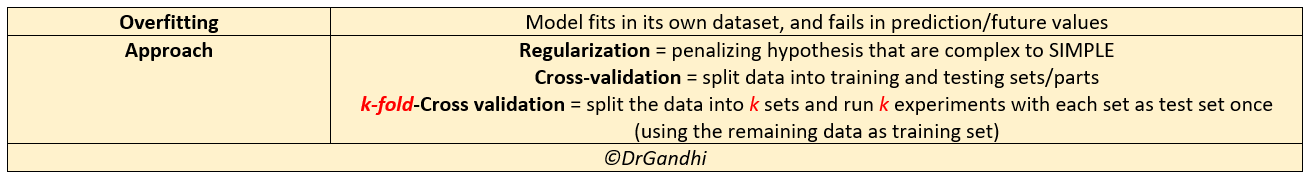

For **Cross-validation**: You can read notes at https://bit.ly/3Bfmzal

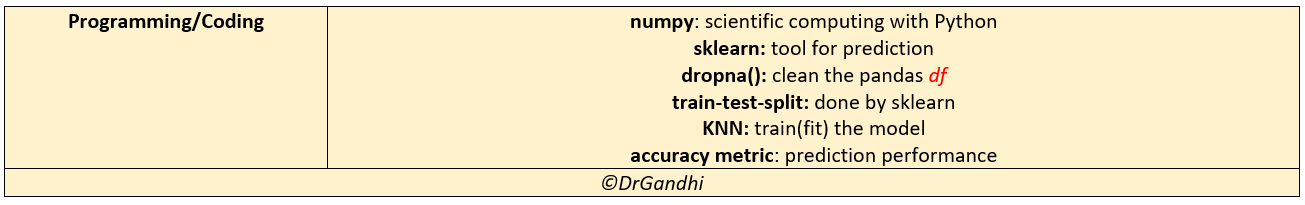

In [11]:
# observe cap latters and no gaps at certain places 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [12]:
newdata_clean = newdata.dropna() 
len(newdata), len(newdata_clean)

(3337, 3309)

In [13]:
X = newdata_clean[['Humidity3pm', 'Pressure3pm']] 
y = newdata_clean['RainTomorrow']

In [14]:
y

Date
2008-02-01    Yes
2008-02-02    Yes
2008-02-03    Yes
2008-02-04    Yes
2008-02-05    Yes
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
2017-06-25     No
Name: RainTomorrow, Length: 3309, dtype: object

In [15]:
# In the cited above, we got output as yes/no. 
# Now we need to convert such yes and no by numericals 
X = newdata_clean[['Humidity3pm', 'Pressure3pm']] 
y = newdata_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [16]:
# let's check the output of y 
y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
# random_state = shuffling data points
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Why **42?**

https://bit.ly/2YqBbWf

In [18]:
neigh = KNeighborsClassifier() 
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test) 
accuracy_score(y_test, y_pred)

0.8091787439613527

##**OPTIONAL -I**

In [19]:
# General cheking 
# We have assigned 0 for NO and 1 for Yes
sum(y)

858

In [20]:
# Find percentage
sum(y)/len(y)

0.25929283771532186

In [21]:
# Other way
sum(y==0)/len(y)

0.7407071622846781

##**OPTIONAL -II**

In [22]:
# Visulize the grpah (NOT very IMP)
X_map = np.random.rand(10000,2)
X_map

array([[0.25683198, 0.61124843],
       [0.42350723, 0.17195986],
       [0.80844103, 0.55052039],
       ...,
       [0.31878933, 0.4449014 ],
       [0.67018313, 0.17005217],
       [0.92854863, 0.94657693]])

In [23]:
X_map.shape

(10000, 2)

In [24]:
# Let's re-write the above code as follows
# first values are range of humidity and second values are range of pressure
X_map = np.random.rand(10000,2)
X_map = X_map*(100, 50) + (0, 990)
X_map

array([[  49.3225876 , 1010.13261508],
       [  19.37713034, 1022.29907261],
       [  21.61642546, 1022.40593065],
       ...,
       [  45.42789467,  994.37339435],
       [  53.39657937, 1017.73385603],
       [  11.94047746,  990.76362171]])

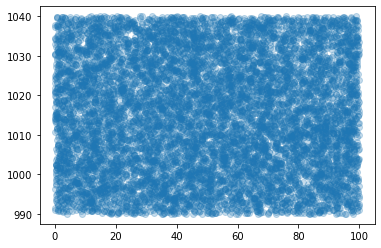

In [25]:
# Let's visulize 
# [:, 0] = All first co-ordinates
# [:, 1] = All second co-ordinates
fig, ax = plt.subplots()
ax.scatter(x=X_map[:, 0], y=X_map[:,1], alpha = 0.25)

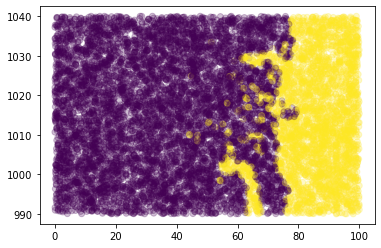

In [26]:
fig, ax = plt.subplots()
y_map = neigh.predict(X_map)   # Create graph for predictive values
ax.scatter(x=X_map[:, 0], y=X_map[:,1], c=y_map, alpha = 0.25) # Add color to predictive values

##**NOT** Optional

In [27]:
# Giving range to k values
scores = []
for k in range(1, 100):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test) 
  score = accuracy_score(y_test, y_pred)
  scores.append(score)

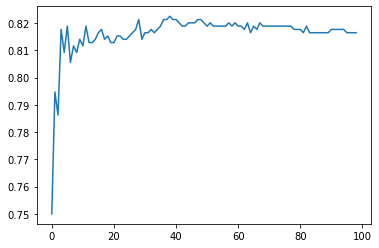

In [28]:
# Let's make a visulization 
fig, ax = plt.subplots() 
ax.plot(scores)

If k = 1 some accuracy you can see in the cited above figure

If k = 4 or 5 or 6, then we have good accuracy in prediction

If k is incresed and near to 100, there is no great accuracy and NO GAIN

**Problem for YOU**



Consider a **KNN-Classfier** with **THREE** dimensions 

Conclude whether 3 dimensions is **better** than 2-dimensions or NOT

(c) *DrGandhi*